In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
%matplotlib inline
import pandas as pd
pd.__version__  # for the record

'1.0.3'

In [3]:
idf = pd.read_csv('../data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
#df = df.loc['2012-01-01':,:]
idf.shape
idf.head(3)
idf.tail(3)

(252, 9)

,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2011-07-01,132.089996,134.100006,131.779999,133.919998,117.161659,202385700,132.373927,125.316073,1.219057
2011-07-05,133.779999,134.080002,133.389999,133.809998,117.065437,165936000,133.254297,124.912703,1.066618
2011-07-06,133.490005,134.139999,133.110001,133.970001,117.205429,143331600,134.040915,124.627085,0.992467


,Open,High,Low,Close,Adj Close,Volume,UpperB,LowerB,PercentB
Date,,,,,,,,,
2012-06-27,132.419998,133.429993,131.970001,133.169998,118.980804,108088000,136.447962,128.140042,0.605441
2012-06-28,132.289993,132.990005,131.279999,132.789993,118.641281,169242100,136.500761,128.219241,0.551922
2012-06-29,135.199997,136.270004,134.850006,136.100006,121.598610,212250900,136.721010,128.792993,0.921670


---

#### Using this dataframe, we can of course plot a basic ohlc or candlestick plot:



In [4]:
df = idf.loc['2011-08-15':'2011-11-30',:]
df = idf.loc['2011-07-01':'2011-12-30',:]

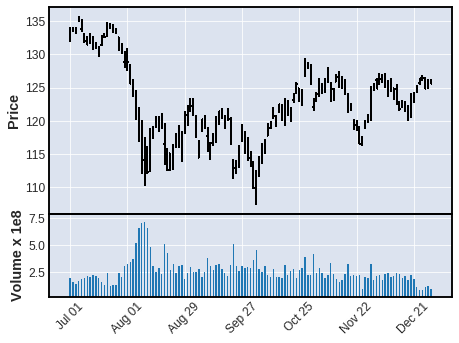

In [5]:
import mplfinance as mpf

mpf.plot(df,volume=True)

In [6]:
df.shape
df.columns

(127, 9)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'UpperB',
       'LowerB', 'PercentB'],
      dtype='object')

In [7]:
exp12 = df['Close'].ewm(span=12, adjust=False).mean()
exp26 = df['Close'].ewm(span=26, adjust=False).mean()

In [8]:
macd = exp12 - exp26

In [9]:
signal = macd.ewm(span=9, adjust=False).mean()
hist = macd - signal

In [10]:
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']

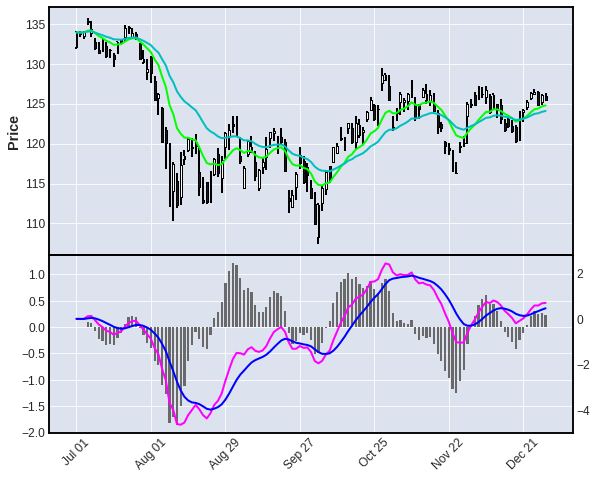

In [11]:
apds = [mpf.make_addplot(exp12,color='fuchsia'),
        mpf.make_addplot(exp26,color='blue'),
        mpf.make_addplot(hist,type='bar',width=0.6,panel='B',color='dimgray',alpha=1),
        mpf.make_addplot(macd,panel='B',color='lime'),#,secondary_y=True),
        mpf.make_addplot(signal,panel='B',color='c')#,secondary_y=True),
        #mpf.make_addplot(histogram,type='bar',width=0.6,panel='B',color='dimgrey',secondary_y=True)
       ]
apds = [mpf.make_addplot(exp12,color='lime'),
        mpf.make_addplot(exp26,color='c'),
        mpf.make_addplot(hist,type='bar',width=0.6,panel='B',color='dimgray',alpha=1,secondary_y=False),
        mpf.make_addplot(macd,panel='B',color='fuchsia',secondary_y=True),
        mpf.make_addplot(signal,panel='B',color='b',secondary_y=True),
        #mpf.make_addplot(histogram,type='bar',width=0.6,panel='B',color='dimgrey',secondary_y=True)
       ]

#mpf.plot(df,type='candle',addplot=apds,figscale=1.5,figratio=(8,5),
#         style='charles',volume=True,panel_order='ACB',panel_ratio=(6,2,3))
mpf.plot(df,type='candle',addplot=apds,figscale=1.3,figratio=(8,6.5),
         style='default',panel_order='ACB',panel_ratio=(7,5,3))

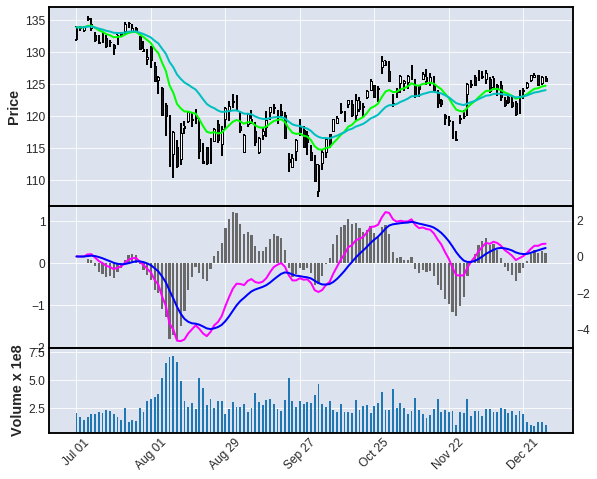

In [12]:
mpf.plot(df,type='candle',addplot=apds,figscale=1.3,figratio=(8,6.5),
         style='default',panel_order='ABC',panel_ratio=(7,5,3),volume='C')